# Visualize Jona's beams

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [25]:
beam_0_7 = np.loadtxt(
    '/fastpool/yuping/jonas-beams/farfield_source_f=0.70_1_foD_0p315_ThetaPhi0.1deg.ffs',
skiprows=31, dtype={'names': ('phi', 'theta', 're_e_theta', 'im_e_theta', 're_e_phi', 'im_e_phi'),
                   'formats': ['f'] * 6})

In [10]:
beam_0_7['im_e_phi'][0]

0.057920363

(1.0, 60.0)

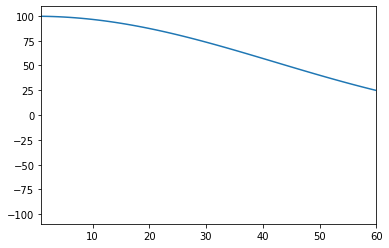

In [14]:
plt.plot(beam_0_7['re_e_theta'])
plt.xlim([1,60])

phi is azimuthal angle and theta the other angle. Theta varies first in the data.

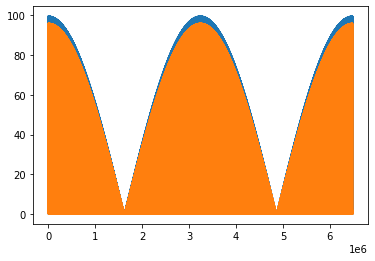

In [26]:
plt.plot(np.abs(beam_0_7['re_e_theta']), label='re_e_theta')
plt.plot(np.abs(beam_0_7['im_e_theta']), label='im_e_theta')

In [28]:
beam_0_7[1500000]

(83.2, 156.8, 0.02777795, -0.00358521, 0.15281165, -0.20650217)

In [37]:
beam_0_7[4862700]

(270., 0., 0.07252419, -0.05792036, 99.62479, 96.0299)

In [40]:
beam_0_7[1620900]

(90., 0., -0.07252419, 0.05792036, -99.62479, -96.0299)

In [36]:
np.argmax(beam_0_7['re_e_phi'])

4862700

In [38]:
np.argmin(beam_0_7['re_e_phi'])

1620900

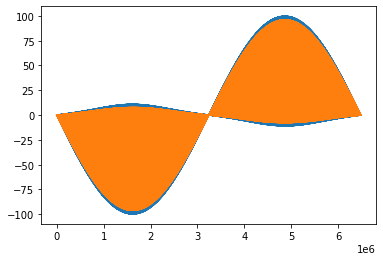

In [43]:
plt.plot(beam_0_7['re_e_phi'])
plt.plot(beam_0_7['im_e_phi'])

near phi=90 and 270 degrees, the phi component gets big. Near phi=0 and 180, the theta component is big. I think the E vector points in the polarization direction.

(0.0, 200.0)

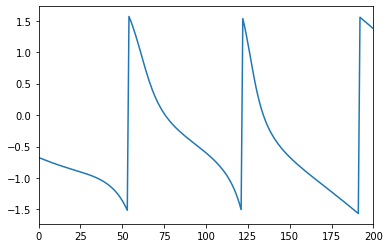

In [54]:
plt.plot(np.arctan(beam_0_7['im_e_phi']/beam_0_7['re_e_phi']))
plt.xlim([0, 200])

(0.0, 200.0)

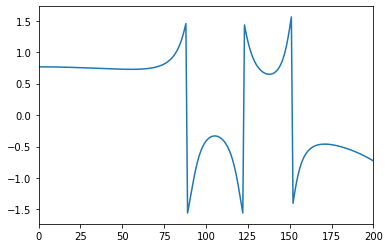

In [55]:
plt.plot(np.arctan(beam_0_7['im_e_theta']/beam_0_7['re_e_theta']))
plt.xlim([0, 200])

Try to recover the X (or Y) component...

(0.0, 10000.0)

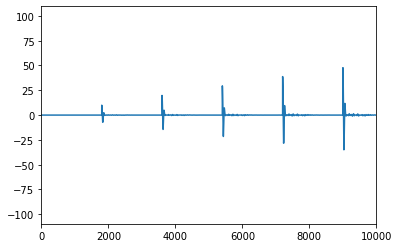

In [65]:
plt.plot(np.sqrt(beam_0_7['re_e_theta']**2
                 + beam_0_7['re_e_phi']**2) * np.cos(beam_0_7['theta'])
         * np.sin(beam_0_7['phi']))
plt.xlim([0,10000])

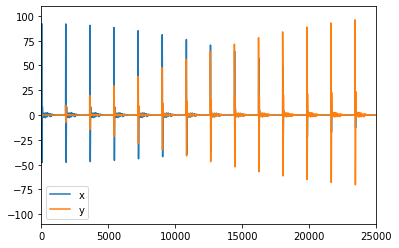

In [71]:
plt.plot(np.sqrt(beam_0_7['re_e_theta']**2
                 + beam_0_7['re_e_phi']**2) * np.sin(beam_0_7['theta'])
         * np.cos(beam_0_7['phi']), label='x')
plt.plot(np.sqrt(beam_0_7['re_e_theta']**2
                 + beam_0_7['re_e_phi']**2) * np.cos(beam_0_7['theta'])
         * np.sin(beam_0_7['phi']), label='y')
plt.xlim([0,25000])
plt.legend()

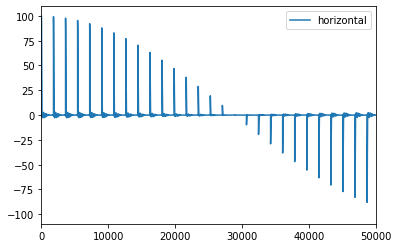

In [76]:
plt.plot(beam_0_7['re_e_theta']*np.cos(beam_0_7['phi']) -
         np.sin(beam_0_7['phi'])*beam_0_7['re_e_phi'], label='horizontal')
plt.xlim([0,50000])
plt.legend()

(0.0, 200.0)

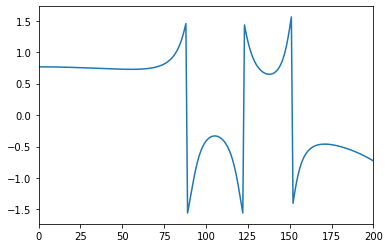

In [95]:
plt.plot(np.arctan(beam_0_7['im_e_theta']/beam_0_7['re_e_theta']))
plt.xlim([0,200])

## Try to do a 2D thing

In [106]:
x = beam_0_7['theta'] * np.cos(beam_0_7['phi'])
y = beam_0_7['theta'] * np.sin(beam_0_7['phi'])

In [100]:
beam_0_7 = beam_0_7.reshape((3601, 1801))

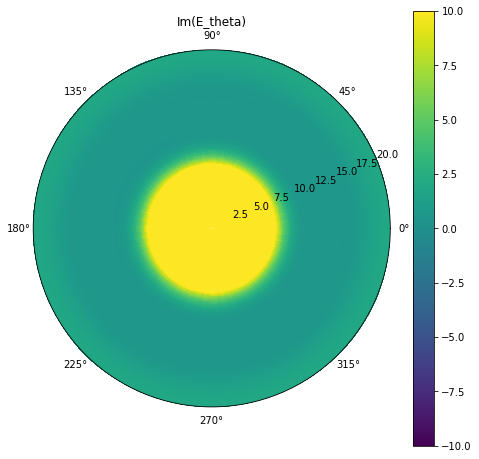

In [146]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, polar = True)
p = ax.pcolormesh(beam_0_7['phi'], beam_0_7['theta'], beam_0_7['im_e_theta'],
                  shading='nearest', vmin=-10, vmax=10)
ax.set_title('Im(E_theta)')
ax.set_rlim(0,20)
fig.colorbar(p)

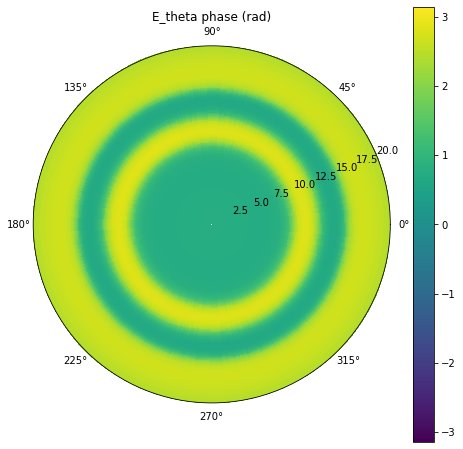

In [151]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, polar = True)
p = ax.pcolormesh(beam_0_7['phi'], beam_0_7['theta'],
                  np.arctan2(beam_0_7['im_e_theta'], beam_0_7['re_e_theta']),
                  shading='nearest')
ax.set_title('E_theta phase (rad)')
ax.set_rlim(0,20)
fig.colorbar(p)

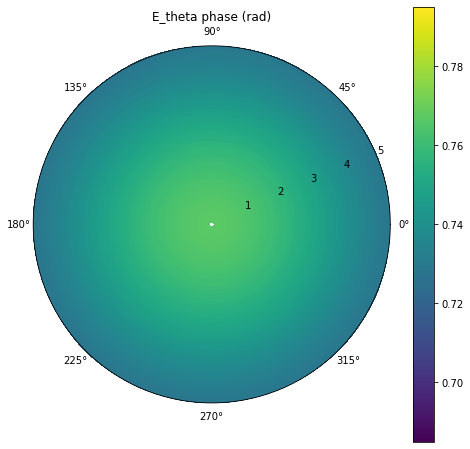

In [157]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, polar = True)
p = ax.pcolormesh(beam_0_7['phi'], beam_0_7['theta'],
                  np.arctan2(beam_0_7['im_e_theta'], beam_0_7['re_e_theta']),
                  shading='nearest',vmin=3.14/4-0.1, vmax=3.14/4+0.01)
ax.set_title('E_theta phase (rad)')
ax.set_rlim(0,5)
fig.colorbar(p)

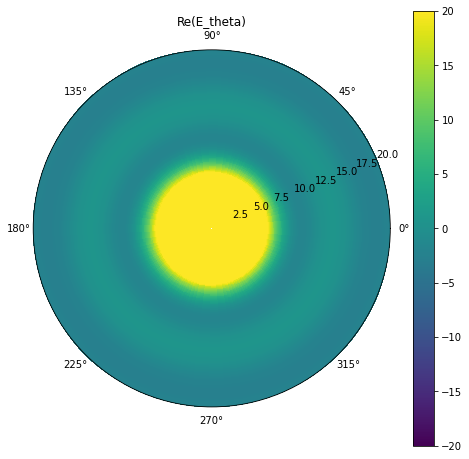

In [149]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, polar = True)
p = ax.pcolormesh(beam_0_7['phi'], beam_0_7['theta'], beam_0_7['re_e_theta'],
                  shading='nearest', vmin=-20, vmax=20)
ax.set_title('Re(E_theta)')
ax.set_rlim(0,20)
fig.colorbar(p)

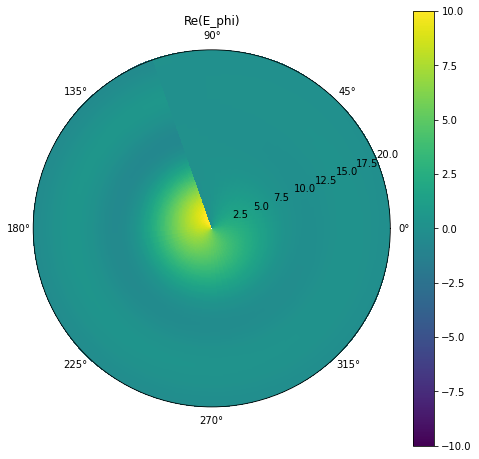

In [160]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, polar = True)
p = ax.pcolormesh(beam_0_7['phi'], beam_0_7['theta'], beam_0_7['re_e_phi'],
                  shading='nearest', vmin=-10, vmax=10)
ax.set_rlim(0,20)
ax.set_title('Re(E_phi)')
fig.colorbar(p)

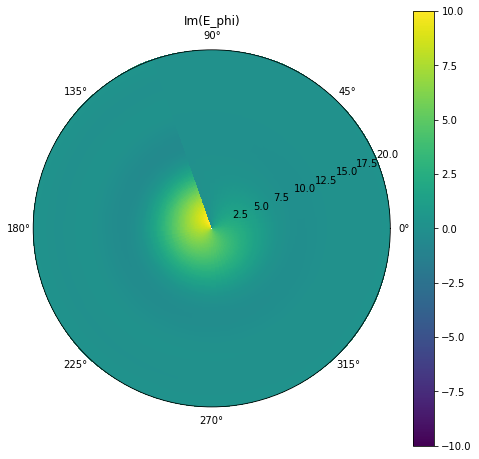

In [161]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, polar = True)
p = ax.pcolormesh(beam_0_7['phi'], beam_0_7['theta'], beam_0_7['im_e_phi'],
                  shading='nearest', vmin=-10, vmax=10)
ax.set_title('Im(E_phi)')
ax.set_rlim(0,20)
fig.colorbar(p)